## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#remove duplicates (per mouse)
# mouse_metadata = mouse_metadata.drop_duplicates()
# study_results = mouse_metadata.drop_duplicates()

# Combine the data into a single dataset
merge_mouse_df = pd.merge(study_results,mouse_metadata, on='Mouse ID', how="left")
merge_mouse_df


# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = merge_mouse_df.drop_duplicates(subset=['Mouse ID'])
mouse_count = mouse_count.loc[:, ['Mouse ID']]
mouse_count.count()

Mouse ID    249
dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = merge_mouse_df.loc[:, ['Mouse ID', 'Timepoint']]

mouse_duplicates[mouse_duplicates.duplicated(keep=False)]


,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10
681,g989,10
815,g989,15
869,g989,15
950,g989,20
1111,g989,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates = merge_mouse_df[merge_mouse_df.duplicated(keep=False)]
mouse_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and taking the last value to determine tumor size at the end of the study
mouse_clean = merge_mouse_df.drop_duplicates(subset=['Mouse ID'], keep='last')
mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.000000,0,Ketapril,Male,15,29
20,x336,0,45.000000,0,Naftisol,Female,4,29
53,h428,0,45.000000,0,Ketapril,Female,1,27
55,v199,0,45.000000,0,Naftisol,Female,17,29
109,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = mouse_clean.loc[:, ['Mouse ID']]
mouse_clean_count.count()

Mouse ID    249
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_clean


    #New df for tumor data
mouse_tumor = mouse_clean.loc[:, ['Mouse ID','Tumor Volume (mm3)','Drug Regimen']]

mouse_tumor_mean = mouse_tumor.groupby(['Drug Regimen']).mean()

mouse_tumor_median = mouse_tumor.groupby(['Drug Regimen']).median()
mouse_tumor_var = mouse_tumor.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_tumor_std = mouse_tumor.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_tumor_sem = mouse_tumor.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


merge_tumor_stats = pd.merge(mouse_tumor_mean,mouse_tumor_median, on='Drug Regimen', how="left")
merge_tumor_stats = pd.merge(merge_tumor_stats,mouse_tumor_var, on='Drug Regimen', how="left")
merge_tumor_stats = merge_tumor_stats.rename(columns={
    "Tumor Volume (mm3)_x":"Average Tumor Size (mm3)",
    "Tumor Volume (mm3)_y":"Median Tumor Size (mm3)", 
    "Tumor Volume (mm3)" :"Variance in Tumor Size (mm3)",
    })

merge_tumor_stats = pd.merge(merge_tumor_stats,mouse_tumor_std, on='Drug Regimen', how="left")
merge_tumor_stats = pd.merge(merge_tumor_stats,mouse_tumor_sem, on='Drug Regimen', how="left")

merge_tumor_stats = merge_tumor_stats.rename(columns={
    "Tumor Volume (mm3)_x":"StDeve of Tumor Size (mm3)",
    "Tumor Volume (mm3)_y":"SEM Tumor Size (mm3)", 
    })
merge_tumor_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Average Tumor Size (mm3),Median Tumor Size (mm3),Variance in Tumor Size (mm3),StDeve of Tumor Size (mm3),SEM Tumor Size (mm3)
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_tumor_agg_method = mouse_tumor.agg(['mean','median','var', 'std', 'sem'])

mouse_tumor_agg_method

,Tumor Volume (mm3)
mean,54.999137
median,55.841410
var,160.151054
std,12.655080
sem,0.801983


## Bar and Pie Charts

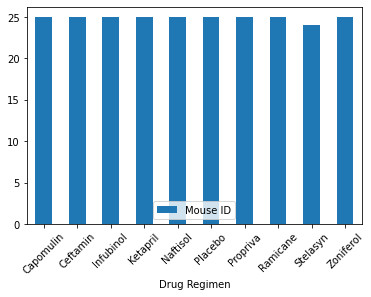

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_uni = mouse_clean.loc[:, ['Mouse ID','Drug Regimen']]
mouse_uni = mouse_uni.groupby("Drug Regimen")
mouse_uni = mouse_uni.agg({"Mouse ID": "nunique"})
mouse_uni = mouse_uni.reset_index()

mouse_uni_panda_graph = mouse_uni.plot.bar(x='Drug Regimen', y='Mouse ID', rot=45)



<ipython-input-11-39cd6678c086>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x_axis, mouse_uni["Mouse ID"], color='bg', alpha=0.75, align="center")


Text(0, 0.5, 'Number of Mice')

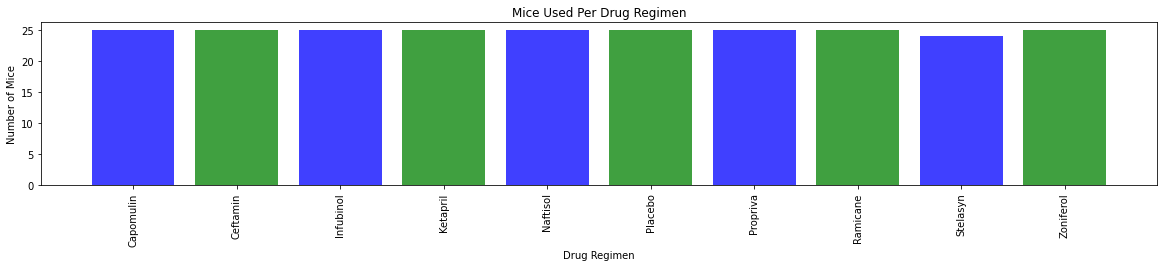

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#determine the count of mice per drug company
mouse_uni = mouse_clean.loc[:, ['Mouse ID','Drug Regimen']]

mouse_uni = mouse_uni.groupby("Drug Regimen")
mouse_uni = mouse_uni.agg({"Mouse ID": "nunique"})
mouse_uni = mouse_uni.reset_index()

# print(mouse_uni)

#create the bar graph

x_axis = np.arange(len(mouse_uni))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(20,3))
plt.bar(x_axis, mouse_uni["Mouse ID"], color='bg', alpha=0.75, align="center")
plt.xticks(tick_locations, mouse_uni["Drug Regimen"], rotation="vertical")


plt.title("Mice Used Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

<AxesSubplot:ylabel='Mouse ID'>

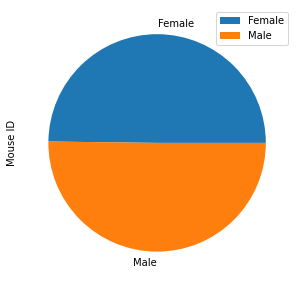

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_compare = mouse_clean.loc[:, ['Mouse ID','Sex']]

mouse_sex_compare = mouse_sex_compare.groupby('Sex')
mouse_sex_compare = mouse_sex_compare.count()

mouse_sex_compare.plot.pie(y='Mouse ID', figsize=(5,5))

(-1.1001107357410598, 1.102325450562254, -1.106768431925549, 1.205932640501736)

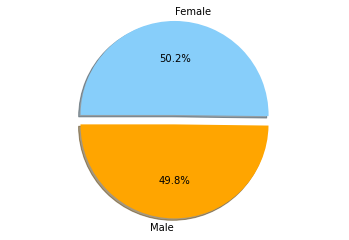

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# # Labels for the sections of our pie chart
labels = ["Male", "Female"]
sizes = mouse_sex_compare['Mouse ID']
colors = ["orange", "lightskyblue"]

explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct="%1.1f%%", shadow=True, startangle=180)

plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# list(merge_mouse_df)
regimen = merge_mouse_df.rename(columns={"Drug Regimen":"Regimen"})
specific = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_specific = regimen[regimen.Regimen.isin(specific)]
regimen_specific.shape



# Start by getting the last (greatest) timepoint for each mouse (Done)
mouse_final_tumor = merge_mouse_df.loc[merge_mouse_df.groupby('Mouse ID').Timepoint.idxmax()]
mouse_final_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#SIDENOTE:------>>>>>>> #  the goal fo this is to filter the table based on the Drug Regimens in the "specific" list above. Instead of combining 2 separate tables to get the final tumor volume per Drug Regimens in the "specific" set, I filterd the table based on the "specific" set using a boolian THEN eliminating all the Timepoint values except for the last one.regimen

regimen_specific_final = regimen_specific.loc[regimen_specific.groupby('Mouse ID').Timepoint.idxmax()]

regimen_specific_final



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1773,a411,45,38.407618,1,Ramicane,Male,3,22
1836,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
1767,y769,45,68.594745,4,Ceftamin,Female,6,27
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16


In [55]:
# Put treatments into a list for for loop (and later for plot labels)


        #--------------------------------------------------------

        #informtaion from "ask BCS learing Assistant."
                # treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

                # tumor_list = []
                
                # for drugs in treat_list:
                    
                #     # Locate the rows which contain mice on each drug and get the tumor volumes
                #     final_tumor = mouse_clean.loc[mouse_clean["Drug Regimen"] == drugs, 'Tumor Volume (mm3)']
                    
                #     tumor_list.append(final_tumor)


                # print(tumor_list)

        #---------------------------------------------------------



final_tumor_separation = mouse_clean.loc[:,['Drug Regimen']]
final_tumor_separation = final_tumor_separation.rename(columns={"Drug Regimen":"Regimen"})
final_tumor_separation

drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

# grouped_mouse = final_tumor_separation.loc[final_tumor_separation.groupby('Regimen').Timepoint.idxmax()]
grouped_mouse = final_tumor_separation.groupby('Regimen')


grouped_mouse.count()




""
Regimen
Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn


In [107]:
# if then separating data in to tumor growth and shrinkage

bin = [0, 45, 10000000]
group_names = ["Shirnkage", "Growth"]

tumor_growth= mouse_clean.loc[:,['Mouse ID','Timepoint','Tumor Volume (mm3)', 'Drug Regimen']]
tumor_growth = tumor_growth.rename(columns={"Drug Regimen":"Regimen"})

# tumor_growth = tumor_growth.loc[tumor_growth.groupby('Regimen').Timepoint.idxmax()]

tumor_growth2 = tumor_growth['Bin'] = pd.cut(tumor_growth['Tumor Volume (mm3)'], bin, labels = group_names, right=False, include_lowest=True)

print(tumor_growth2)

#------------------------------

# merge_tumor = pd.merge(tumor_growth2,grouped_mouse, on='Regimen', how="left")
# merge_tumor



1          Growth
20         Growth
53         Growth
55         Growth
109        Growth
          ...    
1888    Shirnkage
1889    Shirnkage
1890       Growth
1891       Growth
1892       Growth
Name: Tumor Volume (mm3), Length: 249, dtype: category
Categories (2, object): ['Shirnkage' < 'Growth']


In [108]:





# Create empty list to fill with tumor vol data (for plotting)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

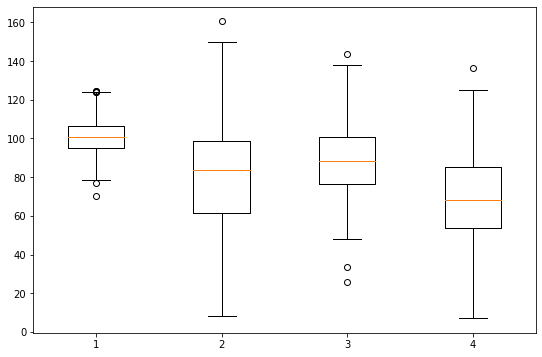

In [109]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# regimen_specific_final


#placeholders for boxplot

np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)

final_tumor_growth = ax.boxplot(data_to_plot)




## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

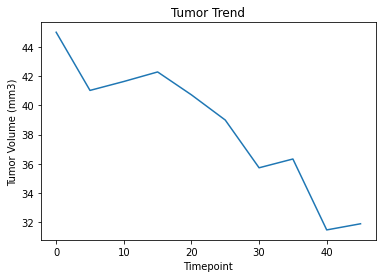

In [110]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


tumor_time = merge_mouse_df.rename(columns={"Drug Regimen":"Regimen", "Mouse ID":"ID"})
specific = ['Capomulin']
mouse = ['y793']
regimen_specific = tumor_time[tumor_time.Regimen.isin(specific)]
regimen_specific = tumor_time[tumor_time.ID.isin(mouse)]
# regimen_specific

x_axis2 = regimen_specific['Timepoint']
y_axis2 = regimen_specific['Tumor Volume (mm3)']

plt.plot(x_axis2, y_axis2)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Tumor Trend" )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

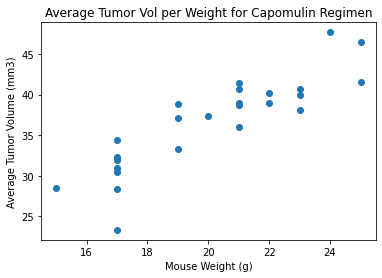

In [111]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#group by mouse id, get the average tumor volume and graph by the weight of each mouse

tumor_weight = mouse_clean.loc[:, ['Mouse ID','Tumor Volume (mm3)','Weight (g)', 'Drug Regimen']]
tumor_weight = tumor_weight.rename(columns={"Drug Regimen":"Regimen", "Mouse ID":"ID"})
specific = ['Capomulin']
tumor_weight = tumor_weight[tumor_weight.Regimen.isin(specific)]


tumor_weight_mean = tumor_weight.groupby(['ID']).mean()

# tumor_weight_mean.head(100)

x_axis2 = tumor_weight_mean['Weight (g)']
y_axis2 = tumor_weight_mean['Tumor Volume (mm3)']


plt.scatter(x_axis2, y_axis2)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title ("Average Tumor Vol per Weight for Capomulin Regimen" )
plt.show


## Correlation and Regression

The r-value is: 0.8767060403658119


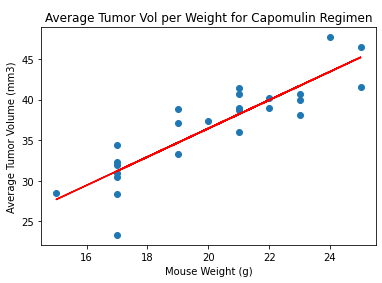

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_axis2 = tumor_weight_mean['Weight (g)']
y_axis2 = tumor_weight_mean['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis2, y_axis2)

plt.plot(x_axis2,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title ("Average Tumor Vol per Weight for Capomulin Regimen" )
print(f"The r-value is: {rvalue}")
plt.show()
